<h3>Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

<h3>Reading and Viewing Data

In [2]:
df = pd.read_csv("adult.data", names=["age", "workclass","final_weight", "education", "education_num", "marital_status",
                                      "occupation", "relationship","race","sex","capital_gain","capital_loss","hours_per_week",
                                      "country", "income"])
df.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.describe()

,age,final_weight,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
df.shape

(32561, 15)

<h3>Replacing income column by target column

In [5]:
# df.loc[df['income'] == '<=50K', 'target'] = 0
# df.loc[df['income'] == '>50K', 'target'] = 1
df["target"] = np.where(df["income"] == ' <=50K', 0, 1)
df.drop("income",axis=1, inplace=True)
# print(df[df['income'] == '<=50K'].shape[0])
# print(df["income"].dtype)

In [6]:
df.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


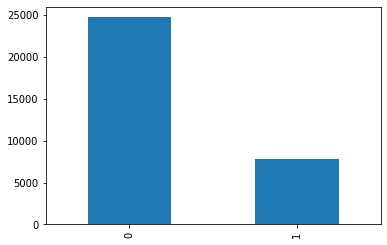

In [7]:
df["target"].value_counts().plot(kind="bar")

In [8]:
df.dtypes

age                int64
workclass         object
final_weight       int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
country           object
target             int32
dtype: object

<h3>Checking for Null Values

In [9]:
df.isnull().sum()

age               0
workclass         0
final_weight      0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
country           0
target            0
dtype: int64

<h3>Splitting data into Train and Test

In [10]:
X = df.iloc[:,:-1]
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)


X_train (22792, 14)
X_test (9769, 14)
y_train (22792,)
y_test (9769,)


<h3>Differentiating Categorical and Numeric Columns

In [11]:
cat_features = [col for col in X_train.columns if X_train[col].dtypes == object]
num_features = [col for col in X_train.columns if X_train[col].dtypes in ["int32", "int64"]]
print("Numeric Features: ", num_features)
print("Categorical Features: ", cat_features)


Numeric Features:  ['age', 'final_weight', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
Categorical Features:  ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'country']


<h3>Creating Pipelines for Operations on Columns

First step would be to create a pipeline for performing the StandardScaler operation on all the numeric columns. Similarly, using OneHotEncoder for Categorical columns and then putting both categorical and numeric columns into ColumnTransformer.

In [12]:
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
cat_transformer = Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[('num_preprocessor', numeric_transformer, num_features), 
                                              ('cat_preprocessor', cat_transformer, cat_features)])

<h3>Creating a Pipeline for Modelling with LogisticRegression

In [13]:
pipeline_log = Pipeline(steps=[('preprocessor', preprocessor), 
                           ('LogRegressor', LogisticRegression(solver='lbfgs', multi_class='auto'))])

<h3>Fitting the model

In [14]:
log_model = pipeline_log.fit(X_train, y_train)
prediction_log = log_model.predict(X_test)
cl_report_log = classification_report(y_test, prediction_log)
print(cl_report_log)

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7386
           1       0.72      0.60      0.66      2383

    accuracy                           0.85      9769
   macro avg       0.80      0.76      0.78      9769
weighted avg       0.84      0.85      0.84      9769



C:\Users\Razi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


<h3>Creating a Pipeline for Modelling with DecisionTree

In [15]:
pipeline_tree = Pipeline(steps=[('preprocessor', preprocessor), 
                           ('TreeClassifier', DecisionTreeClassifier())])
tree_model = pipeline_tree.fit(X_train, y_train)
prediction_tree = tree_model.predict(X_test)
cl_report_tree = classification_report(y_test, prediction_tree)
print(cl_report_tree)

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      7386
           1       0.61      0.63      0.62      2383

    accuracy                           0.81      9769
   macro avg       0.75      0.75      0.75      9769
weighted avg       0.81      0.81      0.81      9769



<h3>Creating a Pipeline for Modelling with RandomForest

In [16]:
pipeline_random = Pipeline(steps=[('preprocessor', preprocessor), 
                           ('ForestClassifier', RandomForestClassifier())])
random_model = pipeline_random.fit(X_train, y_train)
prediction_random = random_model.predict(X_test)
cl_report_random = classification_report(y_test, prediction_random)
print(cl_report_random)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7386
           1       0.72      0.61      0.66      2383

    accuracy                           0.85      9769
   macro avg       0.80      0.77      0.78      9769
weighted avg       0.84      0.85      0.84      9769



<h3>Creating a Pipeline for Modelling with SVM

In [17]:
pipeline_svm = Pipeline(steps=[('preprocessor', preprocessor), 
                           ('SVC', SVC())])
svm_model = pipeline_svm.fit(X_train, y_train)
prediction_svm = svm_model.predict(X_test)
cl_report_svm = classification_report(y_test, prediction_svm)
print(cl_report_svm)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7386
           1       0.76      0.59      0.66      2383

    accuracy                           0.85      9769
   macro avg       0.82      0.77      0.79      9769
weighted avg       0.85      0.85      0.85      9769



<h3>Conclusion

From all above models, it is evident that SVM performs the best. The model can be further improved by hyperparameter tunning which would be part of another exercise